# Shritesh_Jagtap_Waiter_Tips_Prediction

## Waiter Tips (Case Study)
The food server of a restaurant recorded data about the tips given to the waiters for serving the food. The data recorded by the food server is as follows:

total_bill: Total bill in dollars including taxes
tip: Tip given to waiters in dollars
sex: gender of the person paying the bill
smoker: whether the person smoked or not
day: day of the week
time: lunch or dinner
size: number of people in a table 
So this is the data recorded by the restaurant. Based on this data, our task is to find the factors affecting waiter tips and train a machine learning model to predict the waiter’s tipping.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV, cross_val_score, cross_val_predict, train_test_split,cross_validate,KFold,RepeatedKFold
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
import warnings
warnings.filterwarnings('ignore')
from matplotlib import pyplot
from sklearn.preprocessing import LabelEncoder
from matplotlib.colors import ListedColormap
from sklearn.metrics import precision_score, recall_score, accuracy_score,f1_score,confusion_matrix,roc_auc_score,roc_curve 
from sklearn import tree
from numpy import mean
from numpy import std
from sklearn.ensemble import AdaBoostRegressor
from sklearn.impute import KNNImputer

In [2]:
tip= pd.read_csv('raw.txt','\t')
tip

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


In [3]:
tip.dtypes

total_bill    float64
tip           float64
sex            object
smoker         object
day            object
time           object
size            int64
dtype: object

In [4]:
tip.isnull().sum()

total_bill    0
tip           0
sex           0
smoker        0
day           0
time          0
size          0
dtype: int64

In [5]:
tip['tip'].value_counts()

2.00    33
3.00    23
4.00    12
5.00    10
2.50    10
        ..
4.34     1
1.56     1
5.20     1
2.60     1
1.75     1
Name: tip, Length: 123, dtype: int64

In [6]:
tip.describe()

,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


In [7]:
df=tip.copy()

## EDA

In [8]:
tip.columns

Index(['total_bill', 'tip', 'sex', 'smoker', 'day', 'time', 'size'], dtype='object')

{'whiskers': [<matplotlib.lines.Line2D at 0x225449e9d30>,
 'caps': [<matplotlib.lines.Line2D at 0x225450a73d0>,
 'boxes': [<matplotlib.lines.Line2D at 0x225449e9a60>,
 'medians': [<matplotlib.lines.Line2D at 0x225450a78b0>,
 'fliers': [<matplotlib.lines.Line2D at 0x225450a7b80>,
 'means': []}

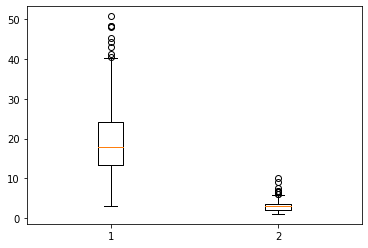

In [9]:
plt.boxplot(tip[['total_bill', 'tip']])

In [10]:
c=tip[(tip['total_bill']<= 30) & (tip['tip']<= 5 )]
c

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
236,12.60,1.00,Male,Yes,Sat,Dinner,2
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


{'whiskers': [<matplotlib.lines.Line2D at 0x22545192ac0>,
 'caps': [<matplotlib.lines.Line2D at 0x225451af4c0>,
 'boxes': [<matplotlib.lines.Line2D at 0x225451a0d30>,
 'medians': [<matplotlib.lines.Line2D at 0x225451afa60>,
 'fliers': [<matplotlib.lines.Line2D at 0x225451afd30>,
 'means': []}

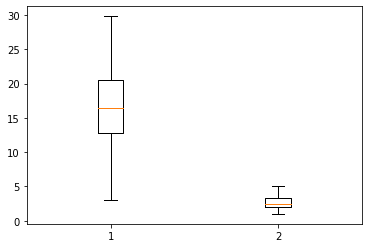

In [11]:
plt.boxplot(c[['total_bill', 'tip']])

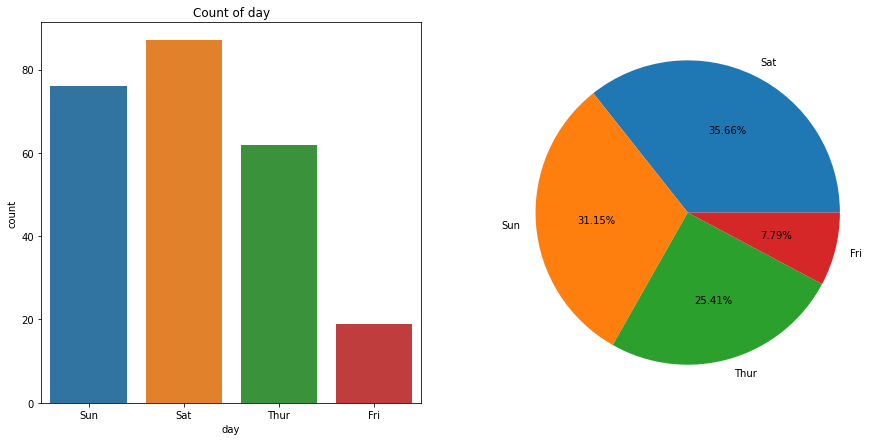

In [12]:
fig, ax = plt.subplots(1, 2, figsize = (15, 7))
ax[0].set_title("Count of day")                  
percentage = tip['day'].value_counts()         
labels = list(tip['day'].value_counts().index) 

sb.countplot(x = tip['day'], ax = ax[0])
plt.pie(percentage,labels = labels, autopct= "%0.2f%%")  

plt.show()

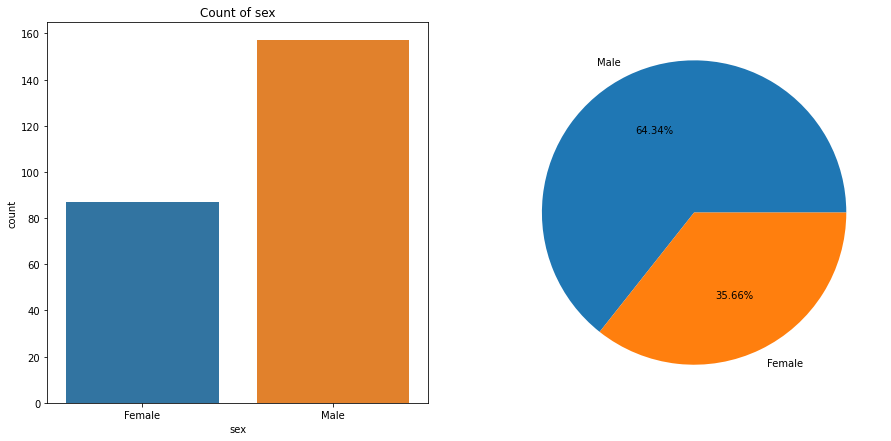

In [13]:
fig, ax = plt.subplots(1, 2, figsize = (15, 7))
ax[0].set_title("Count of sex")                  
percentage = tip['sex'].value_counts()         
labels = list(tip['sex'].value_counts().index) 

sb.countplot(x = tip['sex'], ax = ax[0])
plt.pie(percentage,labels = labels, autopct= "%0.2f%%")  

plt.show()

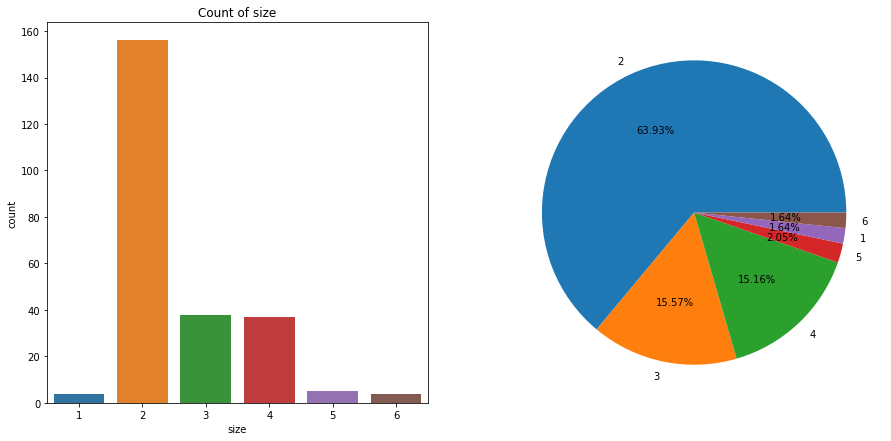

In [14]:
fig, ax = plt.subplots(1, 2, figsize = (15, 7))
ax[0].set_title("Count of size")                  
percentage = tip['size'].value_counts()         
labels = list(tip['size'].value_counts().index) 

sb.countplot(x = tip['size'], ax = ax[0])
plt.pie(percentage,labels = labels, autopct= "%0.2f%%")  

plt.show()

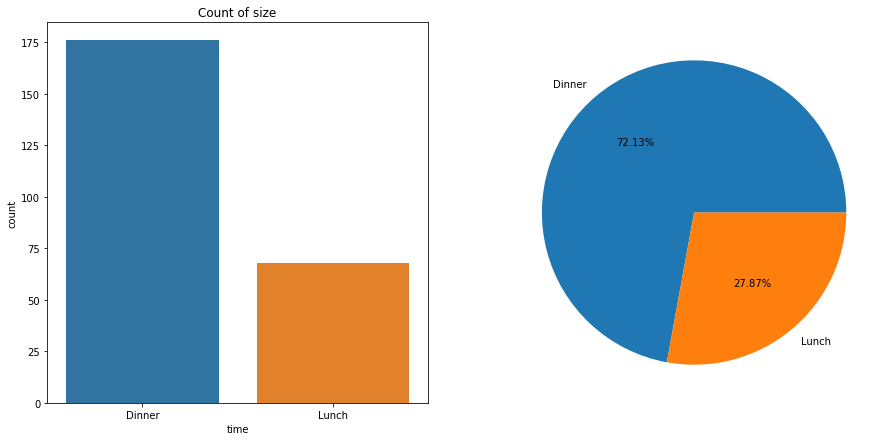

In [15]:
fig, ax = plt.subplots(1, 2, figsize = (15, 7))
ax[0].set_title("Count of size")                  
percentage = tip['time'].value_counts()         
labels = list(tip['time'].value_counts().index) 

sb.countplot(x = tip['time'], ax = ax[0])
plt.pie(percentage,labels = labels, autopct= "%0.2f%%")  

plt.show()

In [16]:
tip.columns

Index(['total_bill', 'tip', 'sex', 'smoker', 'day', 'time', 'size'], dtype='object')

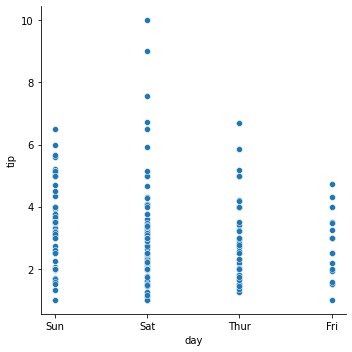

In [17]:
plt.figsize=(20,7)
sb.relplot(x = "day", y = 'tip',data = tip)

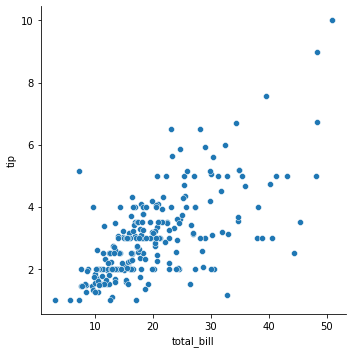

In [18]:
plt.figsize=(20,7)
sb.relplot(x = "total_bill", y = 'tip',data = tip)

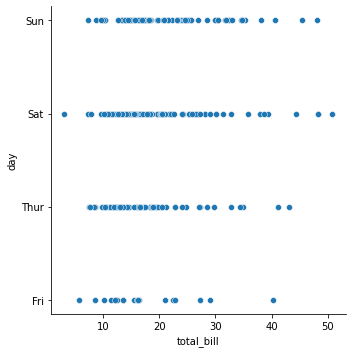

In [19]:
plt.figsize=(20,7)
sb.relplot(x = "total_bill", y = 'day',data = tip)

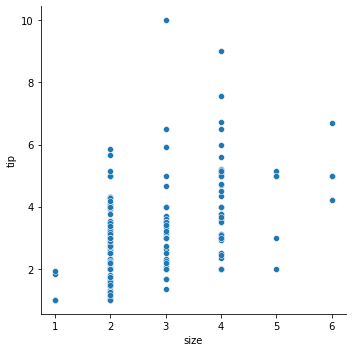

In [20]:
plt.figsize=(20,7)
sb.relplot(x = "size", y = 'tip',data = tip)

### Conclusions:
1. Most visited on Sat \
2. Most visited customer are males \
3. Most visited customer group are of size 2 \
4. Most visited at Dinner Time \
5. High tip was give on Saturdays \
6. Range of size 4 tips are High \
7. Most of Tips are given by size 2  \
8. Increase in Total Bill increases tips also

## DATA PREPROCESSING

In [21]:
cols = ['sex', 'smoker', 'day', 'time']

df[cols] = df[cols].apply(lambda x: x. astype('category'))

df.dtypes

total_bill     float64
tip            float64
sex           category
smoker        category
day           category
time          category
size             int64
dtype: object

In [22]:
cols = ['sex', 'smoker', 'day', 'time']

c[cols] = c[cols].apply(lambda x: x. astype('category'))

c.dtypes

total_bill     float64
tip            float64
sex           category
smoker        category
day           category
time          category
size             int64
dtype: object

In [23]:
label_encoder = preprocessing.LabelEncoder()
df[cols] = df[cols].apply(label_encoder.fit_transform)

df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,0,0,2,0,2
1,10.34,1.66,1,0,2,0,3
2,21.01,3.50,1,0,2,0,3
3,23.68,3.31,1,0,2,0,2
4,24.59,3.61,0,0,2,0,4


In [24]:
label_encoder = preprocessing.LabelEncoder()
c[cols] = c[cols].apply(label_encoder.fit_transform)

c.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,0,0,2,0,2
1,10.34,1.66,1,0,2,0,3
2,21.01,3.50,1,0,2,0,3
3,23.68,3.31,1,0,2,0,2
4,24.59,3.61,0,0,2,0,4


In [25]:
corr= df.corr()
corr

,total_bill,tip,sex,smoker,day,time,size
total_bill,1.000000,0.675734,0.144877,0.085721,-0.043550,-0.183118,0.598315
tip,0.675734,1.000000,0.088862,0.005929,-0.011548,-0.121629,0.489299
sex,0.144877,0.088862,1.000000,0.002816,-0.078292,-0.205231,0.086195
smoker,0.085721,0.005929,0.002816,1.000000,-0.282721,-0.054921,-0.133178
day,-0.043550,-0.011548,-0.078292,-0.282721,1.000000,0.638019,0.069510
time,-0.183118,-0.121629,-0.205231,-0.054921,0.638019,1.000000,-0.103411
size,0.598315,0.489299,0.086195,-0.133178,0.069510,-0.103411,1.000000


## MACHINE LEARNING MODELS

In [26]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import StackingRegressor

In [27]:
def get_stacking():

    level0 = list()
    #level0.append(('lr', LinearRegression()))
    level0.append(('knn', KNeighborsRegressor()))
    level0.append(('cart', DecisionTreeRegressor()))
    level0.append(('svm', SVR()))
    #level0.append(('rf', RandomForestRegressor()))
    
    level1 = LinearRegression()
    
    model = StackingRegressor(estimators=level0, final_estimator=level1, cv=4)
    return model

In [28]:
X = np.array(df.drop(columns='tip', axis =1))
y= np.array(df['tip'])

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                train_size=0.8, 
                                                random_state=8)


model1 = LinearRegression().fit(X_train,y_train)
model2 = DecisionTreeRegressor(max_depth=5).fit(X_train,y_train)
model3 = RandomForestRegressor().fit(X_train,y_train)
model4 = AdaBoostRegressor().fit(X_train,y_train)
model5 = get_stacking().fit(X_train,y_train)


# report performance
#print(n_scores)
perf1=model1.score(X_train, y_train)
perf2=model2.score(X_train, y_train)
perf3=model3.score(X_train, y_train)
perf4=model4.score(X_train, y_train)
perf5=model5.score(X_train, y_train)


mse1=mean_squared_error(y_test, model1.predict(X_test))
mse2=mean_squared_error(y_test, model2.predict(X_test))
mse3=mean_squared_error(y_test, model3.predict(X_test))
mse4=mean_squared_error(y_test, model4.predict(X_test))
mse5=mean_squared_error(y_test, model5.predict(X_test))

rmse1=mean_squared_error(y_test, model1.predict(X_test),squared=False)
rmse2=mean_squared_error(y_test, model2.predict(X_test),squared=False)
rmse3=mean_squared_error(y_test, model3.predict(X_test),squared=False)
rmse4=mean_squared_error(y_test, model4.predict(X_test),squared=False)
rmse5=mean_squared_error(y_test, model5.predict(X_test),squared=False)


In [29]:
comparison = pd.DataFrame({'Perf_train':[perf1,perf2,perf3,perf4,perf5], 'MSE':[mse1,mse2,mse3,mse4,mse5], 'RMSE':[rmse1,rmse2,rmse3,rmse4,rmse5]}, index = ['LINEAR','DECISIONTREE','RANDOM FOREST','BOOSTING','STACKING'])
comparison.sort_values(by=['MSE','RMSE'])

,Perf_train,MSE,RMSE
DECISIONTREE,0.775946,1.374742,1.172494
LINEAR,0.495879,1.378009,1.173886
RANDOM FOREST,0.931365,1.520980,1.233280
STACKING,0.702390,1.532918,1.238111
BOOSTING,0.638533,1.584324,1.258699


### As DECISIONTREE model has less error and good Performance,predictions are shown using this model

## WAITER TIPS PREDICTIVE MODEL

In [30]:
# col = [[total_bill, "sex", "smoker", "day", "time", "size"]]
col = np.array([[25.33, 1, 0, 0, 1, 4]])
tip_pred= model2.predict(col)
tip_pred

array([3.55])